### Importing the dependences

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Data Accessing and Processing

In [2]:
# Loading the data into a Pandas Dataframe
loan_data = pd.read_csv("loan_data_set.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Dimensions of the dataset
loan_data.shape

(614, 13)

In [4]:
# Printing the first five rows of the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Getting some info about the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Statistical distribution of the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Checking the number of missing values in the data
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Dropping the null values as they are less in number
loan_data.dropna(inplace=True)

In [9]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Label encoding of loan status column
loan_data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [11]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
loan_data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
loan_data.replace(to_replace="3+",value=4,inplace=True)

In [14]:
loan_data["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='Married', ylabel='count'>

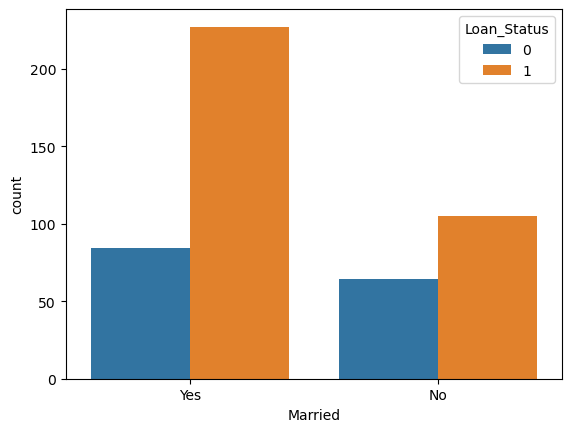

In [15]:
# Chances of a married person to get loan approval
sns.countplot(x="Married",hue="Loan_Status",data=loan_data)

<Axes: xlabel='Education', ylabel='count'>

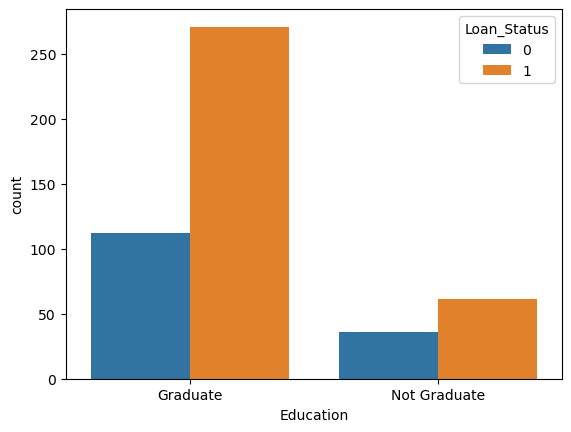

In [16]:
# Chances of an educated person to get loan approval
sns.countplot(x="Education",hue="Loan_Status",data=loan_data)

<Axes: xlabel='Credit_History', ylabel='count'>

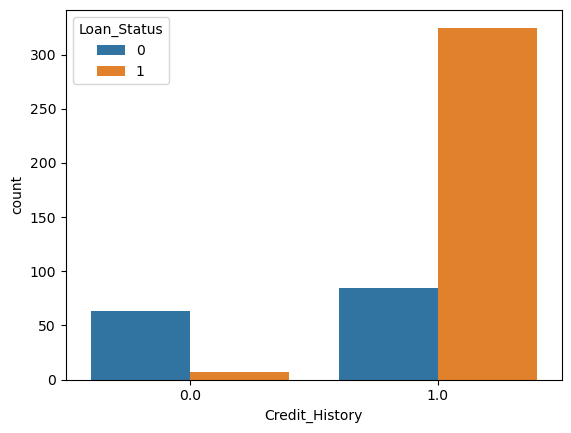

In [17]:
# Chances of a person with clear credit history to get loan approval
sns.countplot(x=loan_data["Credit_History"],hue="Loan_Status",data=loan_data)

### Creating the Feature and Target Variable

In [18]:
new_loan_data = loan_data.copy()

In [19]:
# Label encoding for multiple columns
new_loan_data.replace({"Gender":{"Male":1,"Female":0},"Married":{"Yes":1,"No":0},"Education":{"Graduate":1,"Not Graduate":0}
                  ,"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":0,"Semiurban":1,"Rural":2}},inplace=True)

In [20]:
new_loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [21]:
new_loan_data["Gender"] = new_loan_data["Gender"].astype("int64")
new_loan_data["Married"] = new_loan_data["Married"].astype("int64")
new_loan_data["Dependents"] = new_loan_data["Dependents"].astype("int64")
new_loan_data["Education"] = new_loan_data["Education"].astype("int64")
new_loan_data["Self_Employed"] = new_loan_data["Self_Employed"].astype("int64")
new_loan_data["Loan_Amount_Term"] = new_loan_data["Loan_Amount_Term"].astype("int64")
new_loan_data["Property_Area"] = new_loan_data["Property_Area"].astype("int64")

In [22]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 52.5+ KB


In [23]:
new_loan_data.drop(columns=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']).corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.142074,-0.004606,0.170318,-0.095554,-0.036777,0.028199
ApplicantIncome,0.142074,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.004606,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.170318,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.095554,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.036777,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,0.028199,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


In [24]:
X = new_loan_data.drop(columns=["Loan_ID","Loan_Status"])
y = new_loan_data["Loan_Status"]

In [25]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360,1.0,2
2,1,1,0,1,1,3000,0.0,66.0,360,1.0,0
3,1,1,0,0,0,2583,2358.0,120.0,360,1.0,0
4,1,0,0,1,0,6000,0.0,141.0,360,1.0,0
5,1,1,2,1,1,5417,4196.0,267.0,360,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360,1.0,2
610,1,1,4,1,0,4106,0.0,40.0,180,1.0,2
611,1,1,1,1,0,8072,240.0,253.0,360,1.0,0
612,1,1,2,1,0,7583,0.0,187.0,360,1.0,0


In [26]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### Splitting the data into Training data and Test data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [28]:
# Dimensions of the dataset
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [29]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
513,1,1,0,1,0,2130,6666.0,70.0,180,1.0,1
488,1,1,2,1,1,4583,2083.0,160.0,360,1.0,1
425,1,1,0,1,0,2666,4300.0,121.0,360,1.0,2
116,0,1,0,1,0,3167,2283.0,154.0,360,1.0,1
161,1,1,0,1,0,7933,0.0,275.0,360,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
258,1,1,0,1,0,14683,2100.0,304.0,360,1.0,2
166,0,1,0,1,0,4583,0.0,112.0,360,1.0,2
32,1,0,1,1,1,4692,0.0,106.0,360,1.0,2
516,0,1,2,1,0,2031,1632.0,113.0,480,1.0,1


In [30]:
y_train

513    0
488    1
425    1
116    1
161    0
      ..
258    0
166    0
32     0
516    1
525    1
Name: Loan_Status, Length: 384, dtype: int64

### Training the Model with Suport Vector Machine


In [31]:
model = SVC(kernel="linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

### Model Evaluation using Accuracy score

In [32]:
# Training data accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_prediction)

In [33]:
print("Training data accuracy score : ",training_data_accuracy)

Training data accuracy score :  0.7838541666666666


In [34]:
# Test data accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)

In [35]:
print("Test data accuracy score : ",test_data_accuracy)

Test data accuracy score :  0.7604166666666666


### Building the Predictive System

In [64]:
X_test.iloc[[9]]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
291,1,1,2,1,0,4400,0.0,127.0,360,0.0,1


In [65]:
new_loan_status = X_test.iloc[[9]].values

prediction = model.predict(new_loan_status)
print(prediction)

[1]


C:\Users\Admin\Desktop\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [60]:
if(prediction[0]==0):
    print("Application for your Loan approval has been Rejected")
else:
    print("Application for your Loan approval has been Accepted")

Application for your Loan approval has been Accepted


In [66]:
y_test.iloc[[9]]

291    0
Name: Loan_Status, dtype: int64

In [40]:
import pickle as pkl
file_name = 'classifier.pkl'
pkl.dump(model,open(file_name,'wb'))

In [42]:
loan_data.to_csv('loan_data.csv',index=False)